In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load data from CSV file
data = pd.read_csv("C:\\Users\\bhargav\\traffic_prediction2.csv")

In [4]:
# Select features (independent variables) and target variable (dependent variable)
features = ['Fine - Total Acc.','Mist/fog - Total Acc.', 'Cloudy - Total Acc.', 'Light rain - Total Acc.', 'Heavy rain - Total Acc.', 'Flooding of slipways/rivulers - Total Acc.', 'Hail/sleet - Total Acc.', 'snow - Total Acc.', 'Strong wind - Total Acc.', 'Dust storm - Total Acc.', 'Very hot - Total Acc.', 'Very cold - Total Acc.', 'Other extraordinary weather condition - Total Acc.']
target = 'Total'  # Assuming 'Total' is the column name for total accidents

X = data[features]  # Features DataFrame
y = data[target]  # Target Series

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Set random_state for reproducibility


In [5]:
# Create SVR model
model = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

SVR(kernel='linear')

In [6]:
# Function to predict total accidents for multiple weather conditions
def predict_accidents(weather_list):
    # Create a DataFrame with the input weather (assuming multiple weather types)
    weather_data = pd.DataFrame({feature: 0 for feature in features}, index=[0])
    weather_data.loc[0, weather_list] = 1  # Set values for chosen weather types to 1

    # Predict total accidents
    predicted_accidents = model.predict(weather_data)[0]
    return predicted_accidents


In [7]:
weather_to_predict = ['Light rain - Total Acc.', 'Strong wind - Total Acc.']  # List of weather types
predicted_accidents = predict_accidents(weather_to_predict)
print(f"Predicted total accidents for {weather_to_predict}: {predicted_accidents:.2f}")


Predicted total accidents for ['Light rain - Total Acc.', 'Strong wind - Total Acc.']: 8087.46


In [8]:
# Evaluate model performance on test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse:.2f}")
print(f"R-squared on test set: {r2:.2f}")

Mean Squared Error (MSE) on test set: 1488886.83
R-squared on test set: 0.99


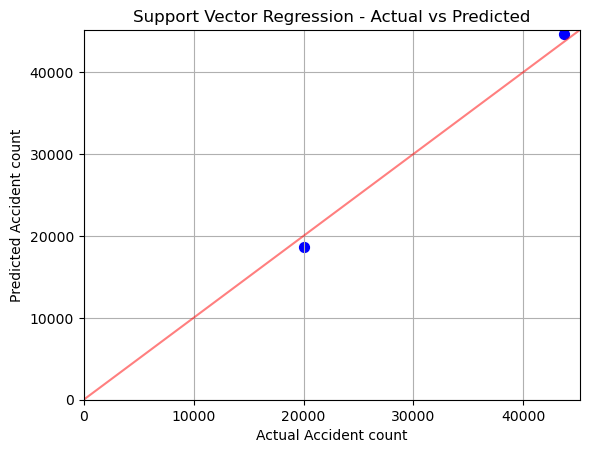

In [9]:
plt.xlabel('Actual Accident count')
plt.ylabel('Predicted Accident count')
plt.title('Support Vector Regression - Actual vs Predicted')
plt.grid(True)

# Determine the actual range of data points for setting plot limits
x_range = max(y_test.max(), y_pred.max()) + 500  # Add a buffer of 500 for better visualization
y_range = max(y_test.max(), y_pred.max()) + 500  # Add a buffer of 500 for better visualization

plt.xlim(0, x_range)  # Set limits for x-axis based on data range
plt.ylim(0, y_range)  # Set limits for y-axis based on data range

plt.plot([0, x_range], [0, y_range], color='red', linestyle='-', alpha=0.5)  # Adjust range as needed
plt.scatter(y_test, y_pred, color='blue', s=50)
plt.show()
